### KNU 한국어 감성사전 - DI LAB
- 참조: http://dilab.kunsan.ac.kr/knusl.html

In [32]:
import json
import pandas as pd
from tqdm import tqdm

In [54]:
SentiWord=pd.read_json('c:/pydata/sw/SentiWord_info.json')

## DataFrame에 새로운 데이터 추가 
SentiWord=SentiWord.append({"word":"알쏭", "word_root":"알쏭", "polarity":-1}, ignore_index=True)
SentiWord.to_csv('c:/pydata/sw/SentiWord_info.csv', index=False)

In [55]:
SentiWord=pd.read_csv('c:/pydata/sw/SentiWord_info.csv')

SentiWord.loc[len(SentiWord)]=["징용", "징용", -2]
SentiWord.loc[len(SentiWord)]=["합의", "합의", 1]
SentiWord.tail()

,word,word_root,polarity
14841,알쏭하다,알쏭하,-1
14842,알쏭달쏭하다,알쏭달쏭,-1
14843,알쏭,알쏭,-1
14844,징용,징용,-2
14845,합의,합의,1


In [56]:
def pos_neg(word):
    tmp=SentiWord[(SentiWord['word']==word) | (SentiWord['word_root']==word)]
    try:
        word_res=(word, tmp['polarity'][tmp.index[0]])
    except:
        word_res=(word, 0)
        
    return word_res

In [57]:
word_res=pos_neg("알쏭")
print(word_res)

('알쏭', -1)


In [58]:
df=pd.read_csv('c:/pydata/중앙일보_일본 올림픽.csv', encoding="cp949")

txt=""
for i in df.index:
    txt=txt+" "+str(df['상세내용'].loc[i])
    
# print(txt)

In [59]:
from konlpy.tag import Okt
okt=Okt()
morp=okt.morphs(txt)
# print(morp)

In [60]:
from tqdm import tqdm
pos_list=[]
neg_list=[]
unkwon_list=[]
for noun in tqdm(morp, "긍/부정 나누기"):
    word_res=pos_neg(noun)
    if word_res[1] > 0:
        pos_list.append(word_res[0])
    elif word_res[1] < 0:
        neg_list.append(word_res[0])
    else:
        unkwon_list.append(word_res[0])

긍/부정 나누기: 100%|███████████████████████████████████████████████████████████| 26408/26408 [00:52<00:00, 501.97it/s]


In [61]:
print("긍정키워드 수:", len(pos_list), "개")
print("부정키워드 수:", len(neg_list), "개")
print("중립 또는 모름 키워드 수:", len(unkwon_list), "개")

긍정키워드 수: 1267 개
부정키워드 수: 2554 개
중립 또는 모름 키워드 수: 22587 개


In [64]:
from collections import Counter   # jdk 제공 모듈

pos_count=dict(Counter(pos_list).most_common()) # 단어별 갯수 계산 및 내림차순 정렬, dict()로 변경
neg_count=dict(Counter(neg_list).most_common())
unkwon_count=dict(Counter(unkwon_list).most_common())
print(pos_count)
# print("=================================================")
# print(neg_count)
# print("=================================================")
# print(unkwon_count)

{'로': 191, '것': 148, '와': 85, '당': 49, '명': 48, '위': 48, '성과': 33, '함께': 19, '히': 19, '세': 18, '합의': 18, '개': 17, '사람': 17, '신': 17, '하기': 16, '잘': 15, '정상': 15, '뜻': 13, '자신': 13, '좋은': 12, '점': 12, '개선': 12, '발전': 12, '지적': 11, '최고': 11, '해결': 11, '노력': 10, '열': 9, '추진': 8, '평화': 8, '의지': 8, '용납': 8, '이해': 8, '정': 7, '신뢰': 7, '상당한': 7, '많다': 6, '유': 6, '사랑': 6, '리': 6, '보답': 6, '긍정': 5, '적극': 5, '예': 5, '선전': 5, '축하': 5, '기대': 4, '크다': 4, '인기': 4, '원': 4, '대상': 4, '제대로': 4, '복': 4, '성공': 4, '회복': 4, '친구': 4, '측은': 3, '이기': 3, '인정': 3, '좋다': 3, '자신감': 3, '순': 3, '마스터': 3, '다행': 3, '새로운': 3, '보': 3, '찬양': 3, '타': 3, '재능': 3, '도움': 3, '강화': 3, '하기를': 3, '달성': 2, '젊은': 2, '좋다고': 2, '중요': 2, '높은': 2, '진실': 2, '기뻐': 2, '여유': 2, '열심히': 2, '높이': 2, '능력': 2, '극복': 2, '높다': 2, '강하게': 2, '충분히': 2, '특별': 2, '상승': 2, '동의': 2, '반성': 2, '교훈': 2, '무사히': 2, '중요한': 2, '꾸준히': 2, '뛰어나다': 2, '압도': 2, '믿음': 2, '치료': 2, '희망': 2, '감당': 2, '화해': 2, '쓰': 2, '존중': 2, '안도': 2, '밝은': 2, '수습': 2, '충분': 2, '건전한': 

In [68]:
stop_words="로 것 와 당 명 위 신 사람 하기 뜻 점 순 타 보 히 세 개 열"
stop_words=stop_words.split(" ")
stop_words

['로',
 '것',
 '와',
 '당',
 '명',
 '위',
 '신',
 '사람',
 '하기',
 '뜻',
 '점',
 '순',
 '타',
 '보',
 '히',
 '세',
 '개',
 '열']

In [70]:
tmp_dic={}
for key, value in pos_count.items():
    if key not in stop_words:
        tmp_dic[key]=value
        
pos_count=tmp_dic
# pos_count

In [71]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

- *nums: 단일 * 인수는 순서형 변수를 전달할 때 사용
- **kawargs:더블 ** 인수는 이름과 값으로 된 사전을 전달할 때 사용

In [87]:
def aa_arge(*nums):
    return sum(nums)

data=[4,5,7,8,9]
print(aa_arge(*data))
print(aa_arge(1,2,3,4))

10
33


In [79]:
### https://www.w3schools.com/colors/colors_hexadecimal.asp
def color_func1(**kawargs):
    color="#0b1177"
    return color

In [75]:
img_path="c:/pydata/sw/good.jpg"
img=Image.open(img_path)
img.size

(831, 789)

In [77]:
cloud_mask=np.array(Image.open(img_path))
cloud_mask.shape
#print(cloud_mask)

(789, 831, 3)

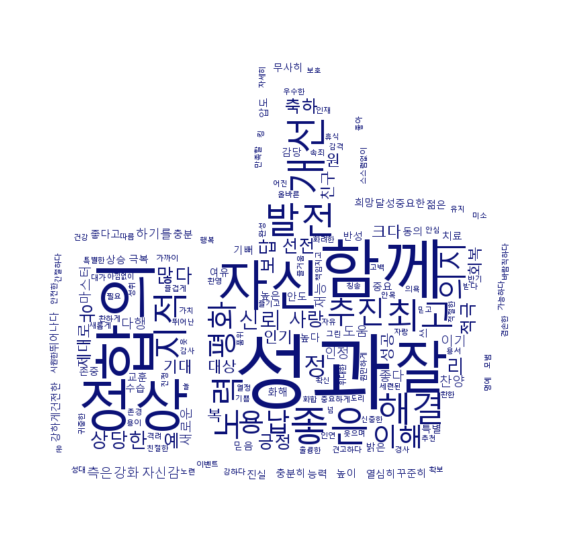

In [80]:
wordcloud = WordCloud(font_path="c:/Windows/Fonts/malgun.ttf",
                      background_color="white", mask=cloud_mask)

wc = wordcloud.generate_from_frequencies(pos_count)
plt.figure(figsize=(10,15))
plt.imshow(wc.recolor(color_func=color_func1), interpolation='bilinear')
plt.axis("off")
plt.show()

In [82]:
### https://www.w3schools.com/colors/colors_hexadecimal.asp
def color_func2(**kawargs):
    color="#f20101"
    return color

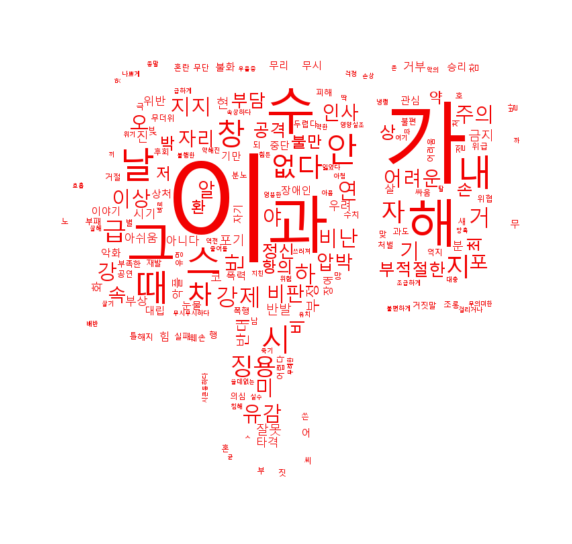

In [84]:
tmp_dic={}
for key, value in neg_count.items():
    if key not in stop_words:
        tmp_dic[key]=value
        
neg_count=tmp_dic
# pos_count

img_path="c:/pydata/sw/bad.jpg"
img=Image.open(img_path)
cloud_mask=np.array(Image.open(img_path))

wordcloud = WordCloud(font_path="c:/Windows/Fonts/malgun.ttf",
                      background_color="white", mask=cloud_mask)

wc = wordcloud.generate_from_frequencies(neg_count)
plt.figure(figsize=(10,15))
plt.imshow(wc.recolor(color_func=color_func2), interpolation='bilinear')
plt.axis("off")
plt.show()